---
title: Head coach Exploratory data analysis
description: ...
---

### Imports

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import seaborn as sns

sns.set_theme(style = 'ticks', palette = 'pastel')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['savefig.bbox'] = 'tight'
# Remove comment for saving figures
sns.set_context("paper")
# Define fig saving context
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.directory'] = 'figures'

import numpy as np
from IPython.display import display, Markdown, HTML

from datetime import datetime

from utils.utils import filter_team, league_team, team_league, unique_teams, unique_teams_coach_change
# league_team : league -> [team]
# team_league : team -> league
# unique_teams : [all teams]
# unique_teams_coach_change : [all teams that have had a coach change]

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

### Loading data

In [2]:
head_coach = pd.read_csv('data/head_coach.csv', parse_dates=['appointed', 'end_date'])
head_coach.head()

,team,league,country,coach_name,staff_dob,staff_nationality,staff_nationality_secondary,appointed,end_date,days_in_post,matches,wins,draws,losses
0,Manchester City,Premier League,England,Pep Guardiola,"Jan 18, 1971",Spain,NaN,2016-07-01,NaT,2784,450,333,53,64
1,Liverpool,Premier League,England,Jürgen Klopp,"Jun 16, 1967",Germany,NaN,2015-10-08,2024-06-30,3188,468,291,96,81
2,Chelsea,Premier League,England,Graham Potter,"May 20, 1975",England,NaN,2022-09-08,2023-04-02,206,31,12,8,11
3,Chelsea,Premier League,England,Thomas Tuchel,"Aug 29, 1973",Germany,NaN,2021-01-26,2022-09-07,589,100,63,19,18
4,Chelsea,Premier League,England,Frank Lampard,"Jun 20, 1978",England,NaN,2019-07-04,2021-01-25,571,84,44,15,25


### General information about data

Data collected from match results ranges from {eval}`min_year.strftime("%m/%d/%Y")` to {eval}`max_year.strftime("%m/%d/%Y")` and contains the results of {eval}`len(match_results)` matches.

Matches have been collected for the following leagues : **{eval}`", ".join(match_results['league'].unique().tolist())`**

### Basic plots

In [3]:
# Useful to add xtick months to dayofyear plot
months = pd.date_range('2022-01-01', '2022-12-31', freq='M').strftime('%b').tolist()
days = np.linspace(1, 365, num=12, dtype=int)

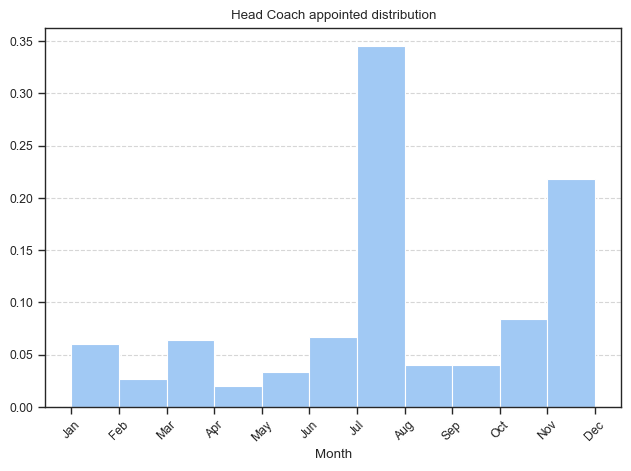

In [4]:
# Plot for Head Coach appointed distribution
plt.figure()
plt.hist(head_coach['appointed'].dt.month, bins=11, color = 'b', density=True)
plt.xticks(range(1, 13), months, rotation=45)
plt.title('Head Coach appointed distribution')
plt.xlabel('Month')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.savefig('figures/head_coach_appointed_distribution.png')

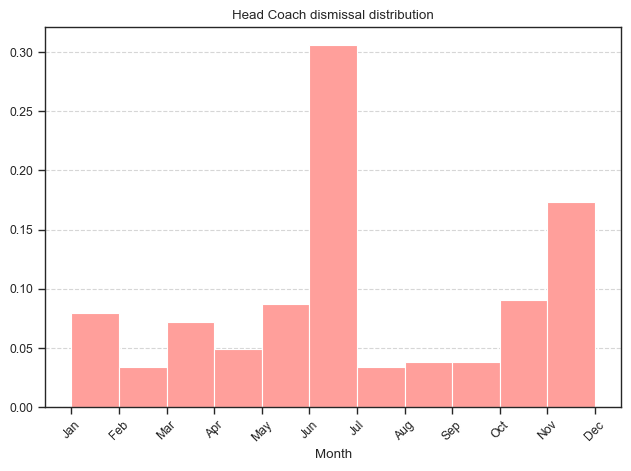

In [5]:
# Plot for Head Coach dismissal distribution
plt.figure()
plt.hist(head_coach['end_date'].dt.month, bins=11, color='r', density=True)
plt.xticks(range(1, 13), months, rotation=45)
plt.title('Head Coach dismissal distribution')
plt.xlabel('Month')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.savefig('figures/head_coach_dismissal_distribution.png')

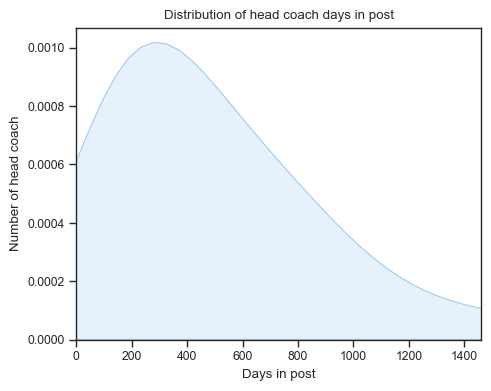

In [60]:
head_coach_dismissed = head_coach[head_coach['end_date'].notnull()]

# Plot distribution of head_coach['days_in_post'] 
plt.figure(figsize=(5, 4))
sns.kdeplot(head_coach_dismissed['days_in_post'], fill=True)
plt.xlim(0, head_coach_dismissed['days_in_post'].quantile(0.95))
plt.title('Distribution of head coach days in post')
plt.xlabel('Days in post')
plt.ylabel('Number of head coach')
plt.savefig('figures/days_in_post_distribution.png')

En moyenne, les coachs sont restés en poste {eval}`round(head_coach_dismissed['days_in_post'].mean())` jours.

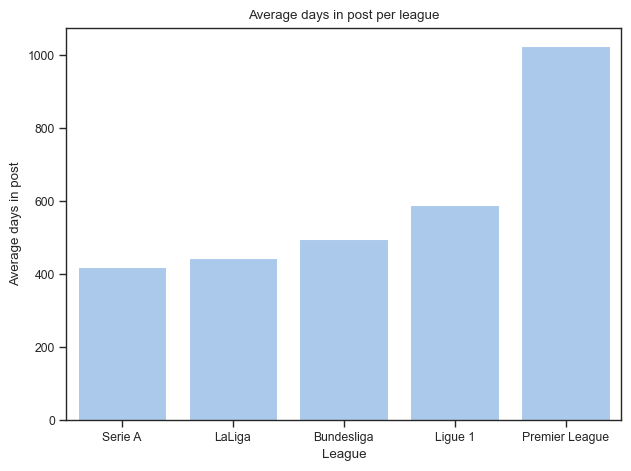

In [ ]:
# Average days in post per league 

# Calculate average days in post per league
avg_days_in_post = head_coach_dismissed.groupby('league')['days_in_post'].mean()
avg_days_in_post = avg_days_in_post.sort_values()

# Plot average days in post per league
plt.figure()
sns.barplot(x=avg_days_in_post.index, y=avg_days_in_post.values)
plt.title('Average days in post per league')
plt.ylabel('Average days in post')
plt.xlabel('League')

plt.savefig('figures/avg_days_in_post_per_league.png')

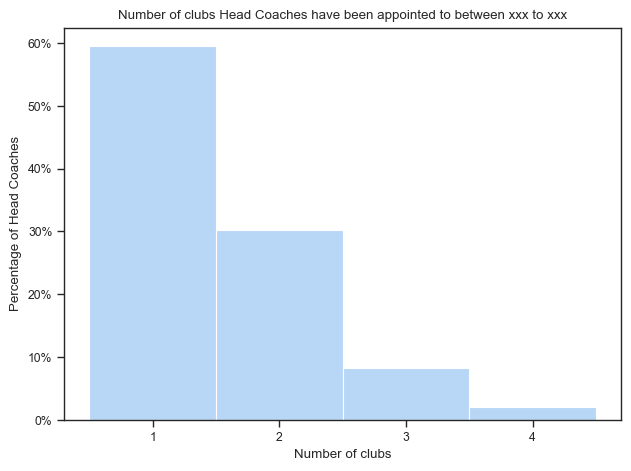

In [50]:
# Number of club head coach has been

# Group by coach_name and count the number of clubs
club_per_coach = head_coach.groupby('coach_name').size().reset_index(name='club_count')

plt.figure()
sns.histplot(x='club_count', data = club_per_coach, discrete = True, stat="probability")
plt.xticks(range(1, club_per_coach['club_count'].max() + 1))
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
plt.title(f'Number of clubs Head Coaches have been appointed to between xxx to xxx')
plt.xlabel('Number of clubs')
plt.ylabel('Percentage of Head Coaches')
plt.savefig('figures/club_count_distribution.png')

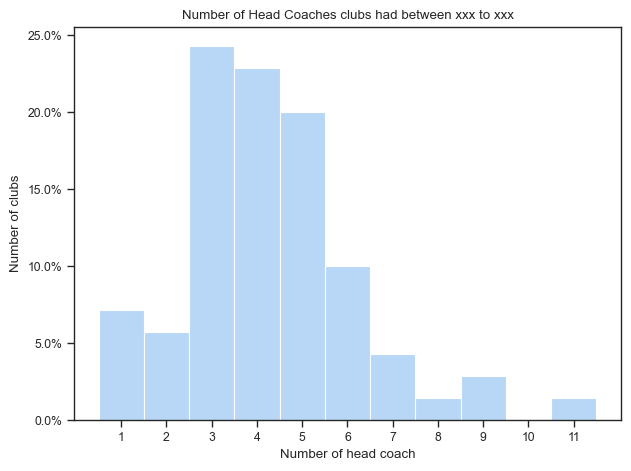

In [51]:
# Number of coach club has seen

# Group by team and count the number of head coach
coach_per_club = head_coach.groupby('team').size().reset_index(name='coach_count')

plt.figure()
sns.histplot(x='coach_count', data = coach_per_club, discrete=True, stat="probability")
plt.xticks(range(1, coach_per_club['coach_count'].max() + 1))
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
plt.title(f'Number of Head Coaches clubs had between xxx to xxx')
plt.xlabel('Number of head coach')
plt.ylabel('Number of clubs')
plt.savefig('figures/coach_count_distribution.png')

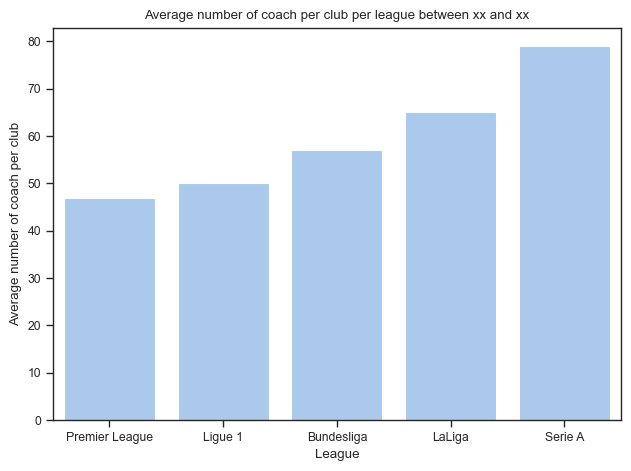

In [55]:
# Average number of coach per club per league 

# Calculate average number of coach per club per league
number_coach_per_league = head_coach.groupby('league')['team'].count().sort_values()

# Plot average number of coach per club per league
plt.figure()
sns.barplot(x=number_coach_per_league.index, y=number_coach_per_league.values)
plt.title('Average number of coach per club per league between xx and xx')
plt.ylabel('Average number of coach per club')
plt.xlabel('League')
plt.savefig('figures/avg_number_of_coach_per_club_per_league.png')

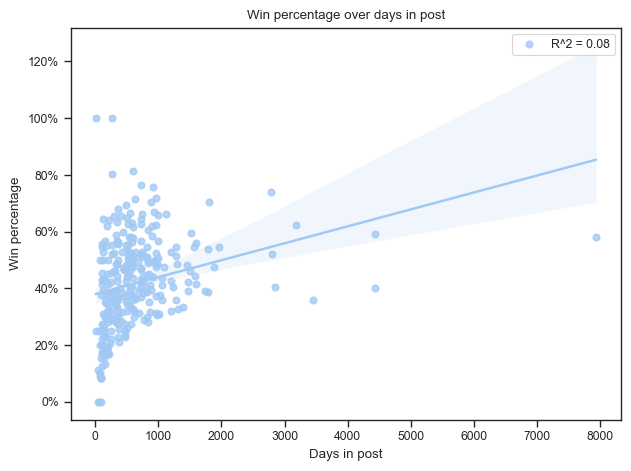

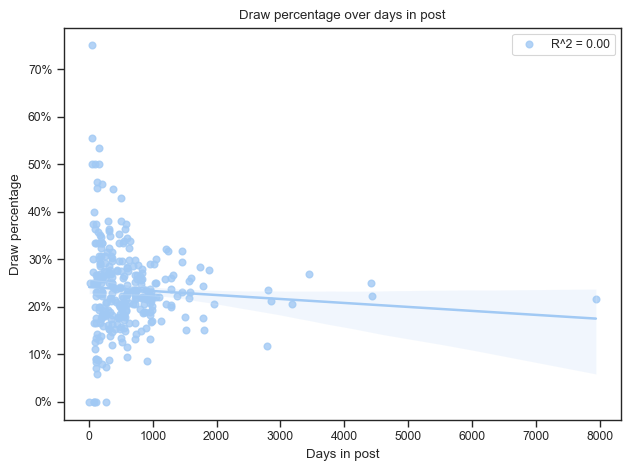

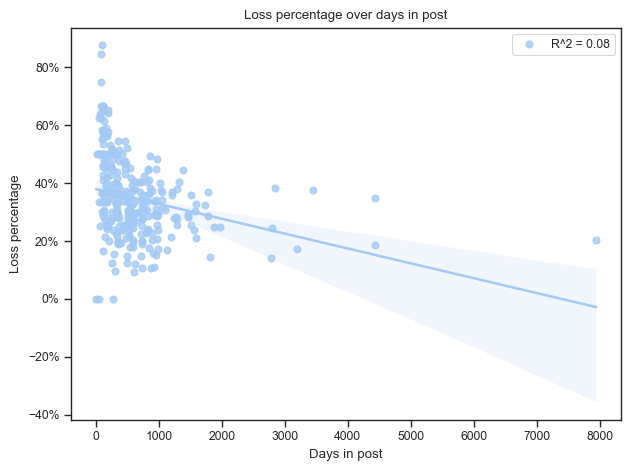

In [67]:
# Number of wins, draw and losses over days in post

# Linear regression of wins, draw and losses over days in post

# head_coach['wins'], head_coach['days_in_post']

head_coach['win_percentage'] = head_coach['wins'] / head_coach['matches'] * 100
head_coach['draw_percentage'] = head_coach['draws'] / head_coach['matches'] * 100
head_coach['loss_percentage'] = head_coach['losses'] / head_coach['matches'] * 100

def plot_percentage_over_days(data, y_value, y_leg):
    plt.figure()
    sns.regplot(x='days_in_post', y=y_value, data=data)
    plt.title(f'{y_leg.capitalize()} percentage over days in post')
    plt.xlabel('Days in post')
    plt.ylabel(f'{y_leg.capitalize()} percentage')
    plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100))

    # Calculate R-squared value
    y_pred = np.poly1d(np.polyfit(data['days_in_post'], data[y_value], 1))(data['days_in_post'])
    ss_res = np.sum((data[y_value] - y_pred) ** 2)
    ss_tot = np.sum((data[y_value] - np.mean(data[y_value])) ** 2)
    r2 = 1 - (ss_res / ss_tot)

    plt.legend([f'R^2 = {r2:.2f}'])

    # Uncomment the line below to save the figure
    plt.savefig(f'figures/{y_value}_percentage_over_days_in_post.png')

# Call the function for each percentage
plot_percentage_over_days(head_coach, 'win_percentage', 'win')
plot_percentage_over_days(head_coach, 'draw_percentage', 'draw')
plot_percentage_over_days(head_coach, 'loss_percentage', 'loss')

Question intéressante : le renouvellement du coach en dehors des dates conventionnelles (été) change t'il l'effet du changement de coach ?